# Introduction

Name : Amar Ma'ruf

Batch/Phase : 5/2

Objective :
> We will classify race of cats, and race that we'll classify are:
- Persian Cat
- Maine Coon Cat
- Sphynx Cat
- Scootish Fold Cat
- Bengal Cat
- Ragdoll Cat 

# Import Pustaka

In [19]:
import os
import pathlib

import pandas as pd
import numpy as np
import random
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Loading

In [2]:
#For accesing directory which we saved our dataset
% cd /content/gdrive/MyDrive/Data Science/Dataset

/content/gdrive/MyDrive/Data Science/Dataset


In [ ]:
#Just to make sure our directory have 3 directory
! ls MS_2_Cat

Test  Train  Validation


In [ ]:
#Check every folder inside folder that we 
for dir_path, dir_name, file_name in os.walk('MS_2_Cat'):
  print("There are {} folders & {} pictures inside {}".format(len(dir_name), len(file_name), dir_path))

There are 3 folders & 0 pictures inside MS_2_Cat
There are 6 folders & 0 pictures inside MS_2_Cat/Validation
There are 0 folders & 10 pictures inside MS_2_Cat/Validation/Maine Coon
There are 0 folders & 10 pictures inside MS_2_Cat/Validation/Bengal
There are 0 folders & 10 pictures inside MS_2_Cat/Validation/Persian
There are 0 folders & 10 pictures inside MS_2_Cat/Validation/Sphynx
There are 0 folders & 10 pictures inside MS_2_Cat/Validation/Ragdoll
There are 0 folders & 10 pictures inside MS_2_Cat/Validation/Scottish Fold
There are 6 folders & 0 pictures inside MS_2_Cat/Train
There are 0 folders & 100 pictures inside MS_2_Cat/Train/Bengal
There are 0 folders & 100 pictures inside MS_2_Cat/Train/Maine Coon
There are 0 folders & 100 pictures inside MS_2_Cat/Train/Persian
There are 0 folders & 100 pictures inside MS_2_Cat/Train/Sphynx
There are 0 folders & 100 pictures inside MS_2_Cat/Train/Scootish Fold
There are 0 folders & 100 pictures inside MS_2_Cat/Train/Ragdoll
There are 0 folder

So folder `MS_2_Cat` contains 3 Folder, every folder contains 6 folder represent the amount of labels (6 race of cats) 

For each `Train` folder that represents labels, there are `100 images`
- 50 images I'am searching by my self throught out the internet
- 50 another images I'm taking from someone's dataset in `Kaggle`, you can check [Here](https://www.kaggle.com/ma7555/cat-breeds-dataset)

For each `Validation` folder, I only use `10 images` for every labels which 
of course not used on `Train` folder

For each `Test` folder, I just use `5 images` which I downloaded from picture of thumbnail from youtube and some artist's cat and picture of my friend's cat

# Data Cleaning

So because this dataset created by my self, there is `no missing value / duplicated value`

We don't need to change any column name because all `data are images`

And of course there is `no outliers` that we need to clean

# Data Exploration

In [ ]:
#So this is race of cat that we used for classification in computer vision  
data_dir = pathlib.Path("MS_2_Cat/Train")
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['Bengal' 'Maine Coon' 'Persian' 'Ragdoll' 'Scootish Fold' 'Sphynx']


In [18]:
def view_image(dir_, class_):
  folder = dir_ + class_

  random_img = random.sample(os.listdir(folder), 1)

  img = mpimg.imread(folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(class_)
  plt.axis("off")
  plt.show()

  print("Image shape :", img.shape)
  return img

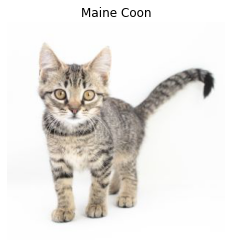

Image shape : (300, 300, 3)


In [17]:
#Here's preview of a picture
img = view_image("MS_2_Cat/Train/", "Maine Coon")

# Data Preprocessing

## Image Data Generator

In [3]:
tf.random.set_seed(42)

#Preprocess data
train = ImageDataGenerator(rescale=1.0/255)
valid = ImageDataGenerator(rescale=1.0/255)
test = ImageDataGenerator(rescale=1.0/255)
#augmented
train_augmented = ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True)

train_dir = "MS_2_Cat/Train"
test_dir = "MS_2_Cat/Validation"
inference_dir = "MS_2_Cat/Test"

In [4]:
train_data = train.flow_from_directory(train_dir, batch_size=32, 
                                       target_size=(256, 256),
                                       class_mode='categorical',
                                       seed=42)
# train_new = train.image_dataset
train_data_augmented = train_augmented.flow_from_directory(train_dir, 
                                                           batch_size=32, 
                                                           target_size=(256, 256),
                                                           class_mode='categorical',
                                                           seed=42)

valid_data = valid.flow_from_directory(test_dir, 
                                       target_size=(256, 256),
                                       class_mode='categorical',
                                       seed=42)

inference_data = test.flow_from_directory(inference_dir, 
                                       target_size=(256, 256),
                                       class_mode='categorical',
                                       seed=42)

Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 60 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [5]:
image, label = train_data.next()
augmented_image, augmented_label = train_data_augmented.next()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


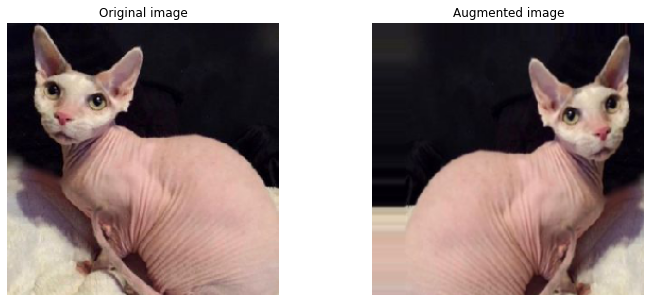

In [6]:
# Original vs Augmented
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
random_number = random.randint(0,10)
ax1.imshow(image[random_number])
ax1.set_title(f"Original image")
ax1.axis("off")
ax2.imshow(augmented_image[random_number])
ax2.set_title(f"Augmented image")
ax2.axis("off")
plt.show()

# Model Definition

## Model Checkpoint

In [7]:
# For basic model
checkpoint_path = './std_checkpoint/'
std_checkpoint = ModelCheckpoint(filepath= checkpoint_path,
                             monitor='val_accuracy',
                             save_best_only= True,
                             save_weights_only= True,
                             mode='max')

# For pretrain model
checkpoint_path = './pretrain_checkpoint/'
pretrain_checkpoint = ModelCheckpoint(filepath= checkpoint_path,
                             monitor='val_accuracy',
                             save_best_only= True,
                             save_weights_only= True,
                             mode='max')

In [8]:
#Basic Model
def basic_model():
  model = Sequential()
  model.add(Conv2D(16, 3, activation= 'relu', input_shape= (256, 256, 3)))
  model.add(Dropout(0.2))
  model.add(MaxPool2D(2))
  model.add(Conv2D(32, 3, activation= 'relu'))
  model.add(Dropout(0.2))
  model.add(MaxPool2D(2))
  model.add(Conv2D(64, 3, activation= 'relu'))
  model.add(Dropout(0.2))
  model.add(MaxPool2D(2))
  model.add(Conv2D(128, 3, activation= 'relu'))
  model.add(Dropout(0.2))
  model.add(MaxPool2D(2))

  model.add(Flatten())

  model.add(Dense(64, activation= 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(16, activation= 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(6, activation= 'softmax', kernel_initializer= 'he_normal'))

  model.compile(loss= 'categorical_crossentropy',
                optimizer= 'adam',
                metrics= ['accuracy'])
  return model

For pretrain model I choose 

In [9]:
import tensorflow as tf
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(299, 299, 3),
                                               include_top=False,
                                               weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [10]:
# Pretrain Model
def pretrain_model():

  base_model.trainable = True

  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  inputs = tf.keras.Input(shape=(299, 299, 3))
  x = base_model(inputs)
  x = Dropout(0.2)(x)
  x = global_average_layer(x)
  x = Dropout(0.2)(x)
  fcl = Dense(32, activation= 'relu')(x)
  fcl = Dropout(0.2)(fcl)
  outputs = Dense(6, activation = 'softmax')(fcl)

  pretrain_model = Model(inputs, outputs)

  fine_tune_at = 250

  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

  pretrain_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                       metrics = ['accuracy'])


  return pretrain_model
print("Number of layers in the base model:", len(base_model.layers))

Number of layers in the base model: 311


# Model Training

In [ ]:
std_model = basic_model()

history1 = std_model.fit(train_data_augmented, epochs=50, 
                    validation_data = valid_data, callbacks=[std_checkpoint])

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch 1/50
19/19 [==============================] - 123s 6s/step - loss: 1.8362 - accuracy: 0.1700 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/50
19/19 [==============================] - 15s 782ms/step - loss: 1.7924 - accuracy: 0.1683 - val_loss: 1.7922 - val_accuracy: 0.1667
Epoch 3/50
19/19 [==============================] - 15s 773ms/step - loss: 1.7908 - accuracy: 0.1667 - val_loss: 1.7921 - val_accuracy: 0.1333
Epoch 4/50
19/19 [==============================] - 17s 891ms/step - loss: 1.7863 - accuracy: 0.1883 - val_loss: 1.7811 - val_accuracy: 0.1667
Epoch 5/50
19/19 [==============================] - 15s 799ms/step - loss: 1.7774 - accuracy: 0.1850 - val_loss: 1.7868 - val_accuracy: 0.2500
Epoch 6/50
19/19 [==============================] - 15s 788ms/step - loss: 1.7863 - accuracy: 0.1867 - val_loss: 1.7912 - val_accuracy: 0.2000
Epoch 7/50
19/19 [==============================] - 15s 787ms/step - loss: 1.7768 - accuracy: 0.1933 - val_loss: 1.7399 - val_accuracy: 0.2500
E

In [ ]:
finetune_model = pretrain_model()

history2 = finetune_model.fit(train_data_augmented, epochs=50, 
                    validation_data = valid_data, callbacks=[pretrain_checkpoint])

Epoch 1/50
 4/19 [=====>........................] - ETA: 9s - loss: 1.5336 - accuracy: 0.4766

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


19/19 [==============================] - 26s 956ms/step - loss: 0.7690 - accuracy: 0.7450 - val_loss: 9.8184 - val_accuracy: 0.7167
Epoch 2/50
19/19 [==============================] - 16s 853ms/step - loss: 0.3491 - accuracy: 0.9067 - val_loss: 0.6369 - val_accuracy: 0.9000
Epoch 3/50
19/19 [==============================] - 16s 860ms/step - loss: 0.2245 - accuracy: 0.9350 - val_loss: 1.9758 - val_accuracy: 0.9000
Epoch 4/50
19/19 [==============================] - 16s 851ms/step - loss: 0.1697 - accuracy: 0.9533 - val_loss: 2.5883 - val_accuracy: 0.8167
Epoch 5/50
19/19 [==============================] - 16s 853ms/step - loss: 0.2105 - accuracy: 0.9517 - val_loss: 0.7555 - val_accuracy: 0.9167
Epoch 6/50
19/19 [==============================] - 16s 851ms/step - loss: 0.1567 - accuracy: 0.9467 - val_loss: 1.9694 - val_accuracy: 0.9000
Epoch 7/50
19/19 [==============================] - 16s 848ms/step - loss: 0.1056 - accuracy: 0.9633 - val_loss: 3.1084 - val_accuracy: 0.9000
Epoch 8/50

# Model Evaluation

Basic Model

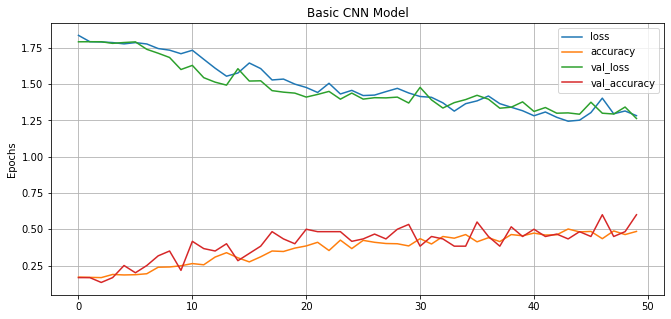

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(11, 5))
plt.grid(True)
# plt.set_ylim(0, 1)
plt.title("Basic CNN Model")
plt.ylabel("Epochs")
plt.show()

Pretrain Model

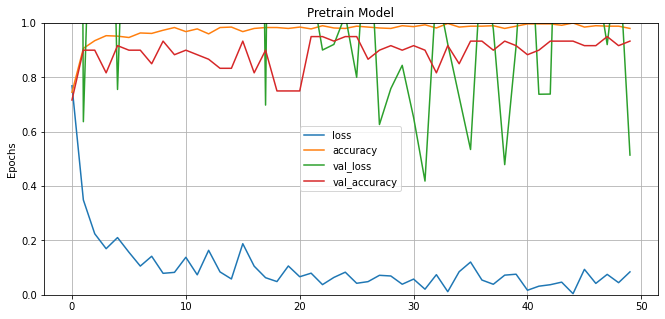

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(11, 5))
plt.grid(True)
plt.ylim(0, 1)
plt.title("Pretrain Model")
plt.ylabel("Epochs")
plt.show()

# Model Saving

In [ ]:
std_model.save("basic_model")
finetune_model.save("Pretrain_model")

INFO:tensorflow:Assets written to: basic_model/assets
INFO:tensorflow:Assets written to: Pretrain_model/assets


# Model Inference

In [20]:
from google.colab import files
files.upload()

Saving 37a579a98169217ca543f33d2d5b151b.jpg to 37a579a98169217ca543f33d2d5b151b.jpg


{'37a579a98169217ca543f33d2d5b151b.jpg': b'RIFF 0\x00\x00WEBPVP8 \x140\x00\x00\xd0}\x01\x9d\x01*\x7f\x02h\x01>y8\x98I\xa4\xa3*\xad"\x10\xdbQ\xa0\x0f\tine\x8a\xe4N\\\xf8\xca\xb0\x8f\xbe \x9e\xab\xb4oW~?\xcf\xf8E\x9c\x9d\xd5\xe6\x10]\xf2:zI\xe9\xfe\x1f\xba\xcb{&?_\x9e\xaf\x8d\x7f\x8fA\x8d\xa3\x13L\xe2\xdb\x17\xcb[\x8f\x9e\xd3\xbaJ\x87\x92o\xf4\xbe\x82\xe4\xe5\x93J\xd2\xa1\xcbS\xf6j\xd2\x99\xd0\xf8xe\x0f\x8fMS\x01\xb5\x97\xa3A\x1ah\xd3\x19\x0c\xe4bc\xc1\x9a\xed\x8f\x03\x96%\x84\xaa\xc0\x9b\xf5\x01\x9e\xe6\xf4c+\xd1\xcc\x03=h7\x15\xcf\x10a\xec\x17\xcd!M3gk\x13\x1c\xc2L`vj\x06z\x96\xd8N\xed \x1f\xcc)\xb3\xe3\xe6\xd0\xee\nl\x80\x02\xd9\xdd!"6\xe2\xbcS\xb2\x17\x0b\xca\xabqbh\\\xb7\x03\x1dTX\xf7\xbe\xb8\xe6\xe1W\x86\x80\xcf\xd5\xd0\xf5#%T`L^\xe2\x16\xdd_\x8c\xff\x99\xb1\xc2\xe4!\xea\xc1\xec\xb3K\x80V\x15\xcbN\x18\xec\xa5\x9c\x93z2\xdb\x1f\xb4\xd3\xc3h|b\x04=\xdcL\xb0E^\xde\x0b5\x18\xa9A0\x1b\xd7\x01\x9d]\xb4\xd5\xe6t\xe2a\xed^\xd8\x1bY\xf0\xe0\xb5\'jm"=0;\xae\xd9$\\\n\xd0;\x0c\x02\xc8\x1f\xd2\

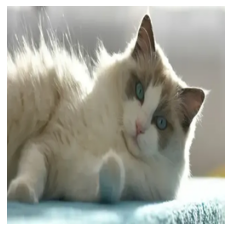

In [21]:
new_img = Image.open('37a579a98169217ca543f33d2d5b151b.jpg')
new_img = new_img.resize((256,256), Image.ANTIALIAS)
new_img_pretrain = new_img.resize((299,299), Image.ANTIALIAS)
plt.imshow(new_img);
plt.axis(False);

In [ ]:
#For Basic Model
new_img = tf.expand_dims(np.array(new_img)/255, axis=0)
res = std_model.predict(new_img)
lst = list(train_data.class_indices.keys())
final_pred = lst[res.argmax()]
for i in range(len(train_data.class_indices)):
  print("Probability race of this cat is {} = {}%".format(lst[i], round(res[0,i]*100, 3)))
print("Model predict this cat as a", final_pred)

Probability race of this cat is Bengal = 16.928%
Probability race of this cat is Maine Coon = 25.183%
Probability race of this cat is Persian = 12.394%
Probability race of this cat is Ragdoll = 7.141%
Probability race of this cat is Scootish Fold = 21.943%
Probability race of this cat is Sphynx = 16.41%
Model predict this cat as a Maine Coon


In [ ]:
#For Pretrain Model
new_img = tf.expand_dims(np.array(new_img_pretrain)/255, axis=0)
res = finetune_model.predict(new_img)
lst = list(train_data.class_indices.keys())
final_pred = lst[res.argmax()]
for i in range(len(train_data.class_indices)):
  print("Probability race of this cat is {} = {}%".format(lst[i], round(res[0,i]*100, 3)))
print("Model predict this cat as a", final_pred)

Probability race of this cat is Bengal = 0.0%
Probability race of this cat is Maine Coon = 0.0%
Probability race of this cat is Persian = 100.0%
Probability race of this cat is Ragdoll = 0.0%
Probability race of this cat is Scootish Fold = 0.0%
Probability race of this cat is Sphynx = 0.0%
Model predict this cat as a Persian


# Load Model

In [25]:
new_model = load_model("Pretrain_model")
new_model.load_weights(checkpoint_path)

new_img = tf.expand_dims(np.array(new_img_pretrain)/255, axis=0)
res = new_model.predict(new_img)
lst = list(train_data.class_indices.keys())
final_pred = lst[res.argmax()]
for i in range(len(train_data.class_indices)):
  print("Probability race of this cat is {} = {}%".format(lst[i], round(res[0,i]*100, 3)))
print("Model predict this cat as a", final_pred)

Probability race of this cat is Bengal = 0.0%
Probability race of this cat is Maine Coon = 0.052%
Probability race of this cat is Persian = 0.476%
Probability race of this cat is Ragdoll = 99.441%
Probability race of this cat is Scootish Fold = 0.03%
Probability race of this cat is Sphynx = 0.001%
Model predict this cat as a Ragdoll


# Conclussion

## EDA Analysis

- There's not much I can write because the data are images, and it's my dataset
- Size of iamges are variety, with smallest 200px ~ 3000++px
-There are 6 labels of cat : Bengal, Maine Coon, Persian, Scotish Fold, Sphynx,
Ragdoll
- Data Train Augmented consist of: 
>     rotation_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True

## Model Analaysis

There are 2 models: 
1. Models that I created from scratch
2. Models from pretrain models keras, I pick `InceptionV3`

- Both of models use CNN for extracting images
- Both of models use `dropout (rate 0.2)` for handling overfit
- But I use different `Fully Connected Layer` configuration
- For `basic model`, the input shape of images I set 256 x 256
- For `pretrain model`, the input shape of images I set 299 x 299 (based on documentation of inceptionV3)
- Fully Connected Layer on `basic model` have more layers and neurons compare to `pretrain model`

`RESULT`
> - `basic model` has tendency to reach better result with more epochs
- `pretrain model` doesn't need many epochs to get maximum accuracy, but the problem is `pretrain model` are overfit 
- `validation loss` have random and unstable value while `loss` keep decreasing
- But from `model inference`, perfoarmance of prediction from `pretrain model` much better than `basic model`
